In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import preprocessing 

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile



df = pd.read_csv('Automobile_data.csv', sep = ',')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Вивів загальну інформацію про датафрейм де видно типи значень та кількість нульових значень. Нульових значень не виявлено

In [4]:
df.duplicated().sum()

0

Оскільки нульових значень та дублікатів немає, то вирішив перевірити підозрілі значення.

In [5]:
df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [6]:
df['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [7]:
df['price'].value_counts()

price
?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: count, Length: 187, dtype: int64

In [8]:
df['bore'].value_counts()

bore
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: count, dtype: int64

In [9]:
df['highway-mpg'].value_counts()

highway-mpg
25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: count, dtype: int64

In [10]:
df['engine-size'].value_counts()

engine-size
122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: count, dtype: int64

In [11]:
df['curb-weight'].value_counts()

curb-weight
2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: count, Length: 171, dtype: int64

In [12]:
df['city-mpg'].value_counts()

city-mpg
31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: count, dtype: int64

Таким чином після перевірки було виявлено значення ? 

In [14]:
indexNormalizedLosses = df[df['normalized-losses'] == '?'].index
df.drop(indexNormalizedLosses , inplace=True)
indexPrice = df[df['price'] == '?'].index
df.drop(indexPrice , inplace=True)
indexNumOfDoors = df[df['num-of-doors'] == '?'].index
df.drop(indexNumOfDoors , inplace=True)
indexBore = df[df['bore'] == '?'].index
df.drop(indexBore , inplace=True)
indexStroke = df[df['stroke'] == '?'].index
df.drop(indexStroke , inplace=True)
indexPeakRPM = df[df['peak-rpm'] == '?'].index
df.drop(indexPeakRPM , inplace=True)
indexHorsepower = df[df['horsepower'] == '?'].index
df.drop(indexHorsepower , inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


Таким чином було видалено рядки із значенням '?'

In [16]:
df = df.apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non-null

Тепер типи даних відповідають тим що в таблиці. 

Після чого розділив дані на числові та категоріальні

In [22]:
num_data = df.select_dtypes(exclude='object')
num_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [23]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    int64  
 7   engine-size        159 non-null    int64  
 8   bore               159 non-null    float64
 9   stroke             159 non-null    float64
 10  compression-ratio  159 non-null    float64
 11  horsepower         159 non-null    int64  
 12  peak-rpm           159 non-null    int64  
 13  city-mpg           159 non-null    int64  
 14  highway-mpg        159 non-null    int64  
 15  price              159 non-null    int64  
dtypes: float64(7), int64(9)
memory 

In [24]:
cat_data = df.select_dtypes(include='object')
cat_data

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
6,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
8,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
10,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [25]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              159 non-null    object
 1   fuel-type         159 non-null    object
 2   aspiration        159 non-null    object
 3   num-of-doors      159 non-null    object
 4   body-style        159 non-null    object
 5   drive-wheels      159 non-null    object
 6   engine-location   159 non-null    object
 7   engine-type       159 non-null    object
 8   num-of-cylinders  159 non-null    object
 9   fuel-system       159 non-null    object
dtypes: object(10)
memory usage: 13.7+ KB


In [28]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(0.6)
sel.fit(num_data)

variancethreshold_data = num_data[num_data.columns[sel.get_support(indices=True)]]
variancethreshold_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,99.8,176.6,66.2,54.3,2337,109,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,8.0,115,5500,18,22,17450
6,1,158,105.8,192.7,71.4,55.7,2844,136,8.5,110,5500,19,25,17710
8,1,158,105.8,192.7,71.4,55.9,3086,131,8.3,140,5500,17,20,23875
10,2,192,101.2,176.8,64.8,54.3,2395,108,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,2952,141,9.5,114,5400,23,28,16845
201,-1,95,109.1,188.8,68.8,55.5,3049,141,8.7,160,5300,19,25,19045
202,-1,95,109.1,188.8,68.9,55.5,3012,173,8.8,134,5500,18,23,21485
203,-1,95,109.1,188.8,68.9,55.5,3217,145,23.0,106,4800,26,27,22470


In [29]:
variancethreshold_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    int64  
 7   engine-size        159 non-null    int64  
 8   compression-ratio  159 non-null    float64
 9   horsepower         159 non-null    int64  
 10  peak-rpm           159 non-null    int64  
 11  city-mpg           159 non-null    int64  
 12  highway-mpg        159 non-null    int64  
 13  price              159 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 18.6 KB


Для початку було обрано метод відбору ознак на основі дисперсії як найпростіший.Зі значенням 0.6. Проте він показав недостатню ефектинвність та відсіяв лише два стовпчики bore та stroke

In [30]:

num_data_norm_symboling = num_data
num_data_norm_symboling['symboling'] = MinMaxScaler().fit_transform(num_data_norm_symboling['symboling'].values.reshape((-1, 1)))
percentile_sel = SelectPercentile(percentile=20)
columns_numerical = num_data.columns
selected_data_percentile = percentile_sel.fit_transform(num_data_norm_symboling.drop(["price"], axis=1), num_data_norm_symboling["price"])
selected_features = percentile_sel.get_feature_names_out(columns_numerical[:len(columns_numerical) - 1])
display(pd.DataFrame(selected_data_percentile, columns=selected_features))


,curb-weight,engine-size,horsepower
0,2337.0,109.0,102.0
1,2824.0,136.0,115.0
2,2844.0,136.0,110.0
3,3086.0,131.0,140.0
4,2395.0,108.0,101.0
...,...,...,...
154,2952.0,141.0,114.0
155,3049.0,141.0,160.0
156,3012.0,173.0,134.0
157,3217.0,145.0,106.0


Тому було обрано f-classif за яким зручно обирати необхідну кількість важливих ознак. У цьому випадку 3. кожен рядок у таблиці містить важливість ознак для відповідного спостереження в наборі даних.


Таким чином найбільший вплив має curb-weight

In [43]:
one_factor_analysis = pd.DataFrame(selected_data_percentile, columns=selected_features)
one_factor_analysis.corr()

,highway-mpg,peak-rpm,engine-type
highway-mpg,1.000000,0.888626,0.790095
peak-rpm,0.888626,1.000000,0.812073
engine-type,0.790095,0.812073,1.000000


<Axes: >

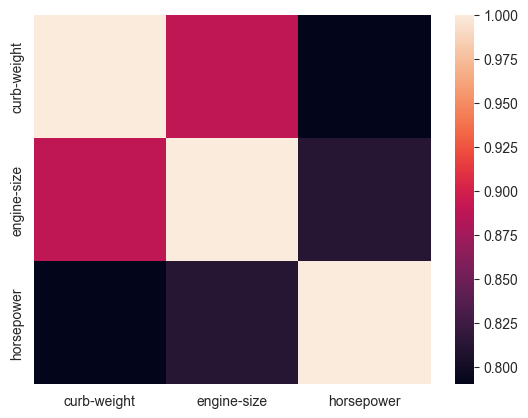

In [36]:
sns.heatmap(one_factor_analysis.corr())

Кореляція впливу ознак одне на одного. Як можна побачити кореляція є позитивною та високою

In [37]:
encoder = preprocessing.LabelEncoder()
df_encoded = df.copy()

df_encoded['make'] = encoder.fit_transform(df_encoded['make'])
df_encoded['fuel-type'] = encoder.fit_transform(df_encoded['fuel-type'])
df_encoded['aspiration'] = encoder.fit_transform(df_encoded['aspiration'])
df_encoded['num-of-doors'] = encoder.fit_transform(df_encoded['num-of-doors'])
df_encoded['body-style'] = encoder.fit_transform(df_encoded['body-style'])
df_encoded['drive-wheels'] = encoder.fit_transform(df_encoded['drive-wheels'])
df_encoded['engine-location'] = encoder.fit_transform(df_encoded['engine-location'])
df_encoded['engine-type'] = encoder.fit_transform(df_encoded['engine-type'])
df_encoded['num-of-cylinders'] = encoder.fit_transform(df_encoded['num-of-cylinders'])
df_encoded['fuel-system'] = encoder.fit_transform(df_encoded['fuel-system'])
 
print(df_encoded)

     symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
3            2                164     0          1           0             0   
4            2                164     0          1           0             0   
6            1                158     0          1           0             0   
8            1                158     0          1           1             0   
10           2                192     1          1           0             1   
..         ...                ...   ...        ...         ...           ...   
200         -1                 95    17          1           0             0   
201         -1                 95    17          1           1             0   
202         -1                 95    17          1           0             0   
203         -1                 95    17          0           1             0   
204         -1                 95    17          1           1             0   

     body-style  drive-wheels  engine-l

In [38]:
array = df_encoded.values
X = array[:,0:24]
Y = array[:,24]
Y = Y.astype('float')

model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.02878014 0.04326484 0.04236575 0.01313245 0.03119287 0.00909504
 0.01743571 0.03529037 0.         0.03075803 0.03501765 0.04774286
 0.03496493 0.08609684 0.03300398 0.01647766 0.05416094 0.0399437
 0.06243174 0.05250684 0.04904535 0.06884305 0.05448874 0.11396052]


Таким чином найважливішою ознакою є highway-mpg, 2- peak-rpm, 3- engine type якщо враховувати не тільки числові значення

In [41]:
num_data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized-losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel-base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb-weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine-size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


<Axes: >

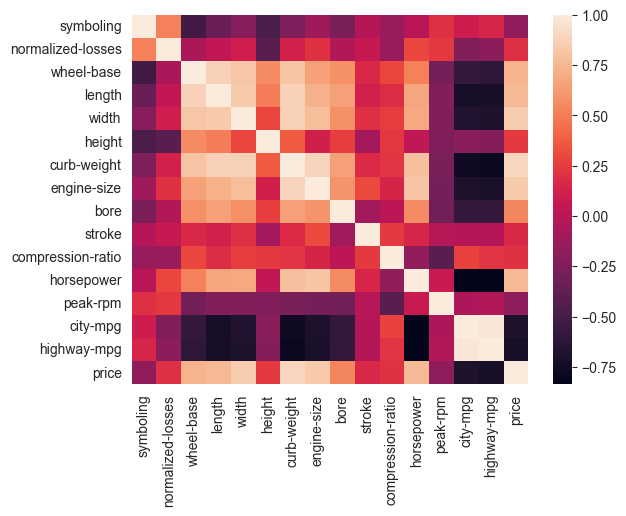

In [42]:
sns.heatmap(num_data.corr())

Також було створено графік кореляції числових даних, щоб простежити залежність однієї ознаки від іншої 